### Plotting with cartopy

(requires save19.npz produced by seaice_II.ipynb)

In [1]:
%matplotlib inline
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import shapely.geometry as sgeom
import numpy as np
import matplotlib
import cartopy
from e582lib.map_slices import make_xy
from rasterio.transform import from_bounds

In [2]:
#http://nsidc.org/data/gis/headers/NL.hdr
cornerx=9024309  #meters, from NL.hdr
cornery=cornerx
newcornerx=cornerx/2.
newcornery=newcornerx
new_extent=[-newcornerx,-newcornery,newcornerx,newcornery]
radius=6371228
van_lon,van_lat = [-123.1207,49.2827]

In [3]:
cmap=matplotlib.cm.get_cmap('viridis')
vmin=220
vmax=260
the_norm=matplotlib.colors.Normalize(vmin=vmin,vmax=vmax,clip=False)

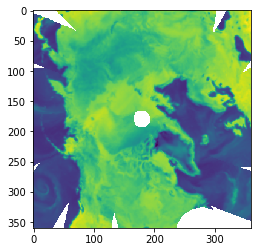

In [4]:
temp19V=np.load('save19.npz')['temps19V']
fig,ax=plt.subplots(1,1)
ax.imshow(temp19V,origin='upper');

pro4_params:  {'a': 6371228, 'b': 6371228, 'proj': 'laea', 'lon_0': -90, 'lat_0': 90, 'x_0': 0.0, 'y_0': 0.0}


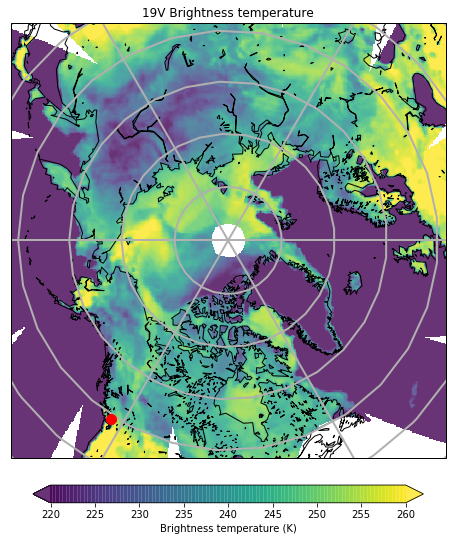

In [5]:
globe = ccrs.Globe(ellipse=None, semimajor_axis=radius, semiminor_axis=radius)
projection=ccrs.LambertAzimuthalEqualArea(central_latitude=90,central_longitude= -90,globe=globe)
print('pro4_params: ',projection.proj4_params)
fig, ax = plt.subplots(1, 1, figsize=(10,10),
                       subplot_kw={'projection': projection})
new_extent=[-newcornerx,newcornerx,-newcornery,newcornery]
ax.set_extent(new_extent,projection)
van_x,van_y=projection.transform_point(van_lon,van_lat,ccrs.Geodetic())
ax.plot(van_x,van_y,'ro',markersize=10);
ax.gridlines(linewidth=2);
ax.add_feature(cartopy.feature.GSHHSFeature(scale='coarse', levels=[1,2,3]))
cs=ax.imshow(temp19V,origin='upper',cmap=cmap,norm=the_norm,
             transform=projection,extent=new_extent,alpha=0.8)
cax,kw = matplotlib.colorbar.make_axes(ax,location='bottom',pad=0.05,shrink=0.7)
out=fig.colorbar(cs,cax=cax,extend='both',**kw)
out.set_label('Brightness temperature (K)',size=10)
ax.set_title('19V Brightness temperature');

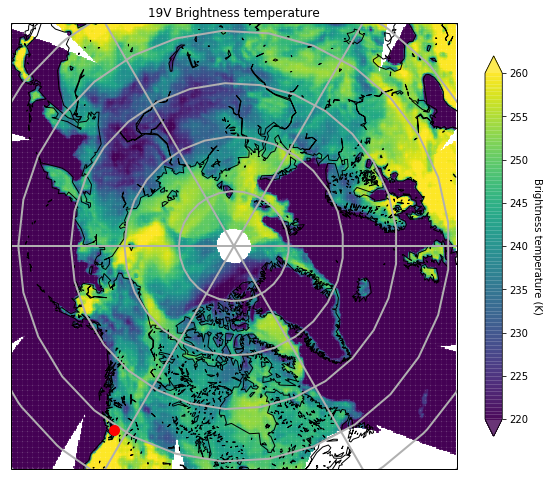

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(10,10),
                       subplot_kw={'projection': projection})
new_extent=[-newcornerx,newcornerx,-newcornery,newcornery]
nrows,ncols=temp19V.shape
transform = from_bounds(-newcornerx,-newcornery,newcornerx,newcornery, ncols, nrows)
xvals,yvals = make_xy(0,nrows,0,ncols,transform)
ax.set_extent(new_extent,projection)
van_x,van_y=projection.transform_point(van_lon,van_lat,ccrs.Geodetic())
ax.plot(van_x,van_y,'ro',markersize=10);
ax.gridlines(linewidth=2);
ax.add_feature(cartopy.feature.GSHHSFeature(scale='coarse', levels=[1,2,3]))
temp19V_mask=np.ma.masked_invalid(temp19V)
cs=ax.pcolormesh(xvals,yvals,temp19V_mask,cmap=cmap,transform=projection,alpha=0.8,norm=the_norm);
cax,kw = matplotlib.colorbar.make_axes(ax,location='right',pad=0.05,shrink=0.7)
out=fig.colorbar(cs,cax=cax,extend='both',**kw)
label=out.set_label('Brightness temperature (K)',size=10,rotation= -90,verticalalignment='bottom')
ax.set_title('19V Brightness temperature');